In [1]:
import netCDF4 as nc
from netCDF4 import num2date,date2index
import datetime
import csv
import numpy as np
import pandas as pd
import xarray as xr
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from tensorflow.keras.initializers import glorot_uniform
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [2]:
data = nc.Dataset('Vwind.nc')

In [3]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.10 (https://mpimet.mpg.de/cdi)
    Conventions: COARDS
    title: monthly mean v wind from the NCEP Reanalysis
    description: Data from NCEP initialized reanalysis (4x/day).  These are interpolated to pressure surfaces from model (sigma) surfaces
    platform: Model
    NCO: 20121012
    dataset_title: NCEP-NCAR Reanalysis 1
    References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.html
    CDO: Climate Data Operators version 1.9.10 (https://mpimet.mpg.de/cdo)
    history: 07-Dec-2023 23:19:50 Subset NOAA/PSL  
    dimensions(sizes): time(708), lon(144), lat(73), level(1)
    variables(dimensions): float64 time(time), float32 lon(lon), float32 lat(lat), float32 level(level), float32 vwnd(time, level, lat, lon)
    groups: 

In [4]:
air = data.variables['vwnd']
print(air)

<class 'netCDF4._netCDF4.Variable'>
float32 vwnd(time, level, lat, lon)
    long_name: Monthly mean v wind
    units: m/s
    _FillValue: -9.96921e+36
    missing_value: -9.96921e+36
    precision: 2
    least_significant_digit: 1
    var_desc: v-wind
    level_desc: Pressure Levels
    statistic: Mean
    parent_stat: Other
    dataset: NCEP Reanalysis Derived Products
    actual_range: [-68.57001  68.56999]
unlimited dimensions: time
current shape = (708, 1, 73, 144)
filling off


In [5]:
air[:]

masked_array(
  data=[[[[-1.5899963 , -1.4199982 , -1.2599945 , ..., -2.0599976 ,
           -1.9100037 , -1.75      ],
          [-1.9400024 , -1.7799988 , -1.6000061 , ..., -2.3899994 ,
           -2.25      , -2.1100006 ],
          [-2.300003  , -2.0800018 , -1.8500061 , ..., -2.8200073 ,
           -2.6699982 , -2.5       ],
          ...,
          [-3.5299988 , -3.699997  , -3.8300018 , ..., -2.9100037 ,
           -3.130005  , -3.3399963 ],
          [-3.5200043 , -3.5899963 , -3.6600037 , ..., -3.2200012 ,
           -3.3200073 , -3.4199982 ],
          [-4.        , -3.9799957 , -3.9600067 , ..., -3.9900055 ,
           -4.        , -4.0099945 ]]],


        [[[-1.8800049 , -1.75      , -1.6100006 , ..., -2.2700043 ,
           -2.1399994 , -2.0099945 ],
          [-1.2700043 , -1.25      , -1.2299957 , ..., -1.3200073 ,
           -1.3099976 , -1.2900085 ],
          [-1.3200073 , -1.3399963 , -1.3399963 , ..., -1.1900024 ,
           -1.25      , -1.2799988 ],
          ...

In [7]:
latitude = data.variables['lat']
print(latitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    axis: Y
    actual_range: [ 90. -90.]
unlimited dimensions: 
current shape = (73,)
filling off


In [8]:
level = data.variables['level']
print(level)

<class 'netCDF4._netCDF4.Variable'>
float32 level(level)
    standard_name: air_pressure
    long_name: Level
    units: millibar
    positive: down
    axis: Z
    GRIB_id: 100
    GRIB_name: hPa
    actual_range: [1000. 1000.]
unlimited dimensions: 
current shape = (1,)
filling off


In [9]:
latitude[:]

masked_array(data=[ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,
                    70. ,  67.5,  65. ,  62.5,  60. ,  57.5,  55. ,  52.5,
                    50. ,  47.5,  45. ,  42.5,  40. ,  37.5,  35. ,  32.5,
                    30. ,  27.5,  25. ,  22.5,  20. ,  17.5,  15. ,  12.5,
                    10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
                   -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5,
                   -30. , -32.5, -35. , -37.5, -40. , -42.5, -45. , -47.5,
                   -50. , -52.5, -55. , -57.5, -60. , -62.5, -65. , -67.5,
                   -70. , -72.5, -75. , -77.5, -80. , -82.5, -85. , -87.5,
                   -90. ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [10]:
longitude = data.variables['lon']
print(longitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    axis: X
    actual_range: [  0.  357.5]
unlimited dimensions: 
current shape = (144,)
filling off


In [11]:
longitude[:]

masked_array(data=[  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,
                    20. ,  22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,
                    40. ,  42.5,  45. ,  47.5,  50. ,  52.5,  55. ,  57.5,
                    60. ,  62.5,  65. ,  67.5,  70. ,  72.5,  75. ,  77.5,
                    80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
                   100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5,
                   120. , 122.5, 125. , 127.5, 130. , 132.5, 135. , 137.5,
                   140. , 142.5, 145. , 147.5, 150. , 152.5, 155. , 157.5,
                   160. , 162.5, 165. , 167.5, 170. , 172.5, 175. , 177.5,
                   180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
                   200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5,
                   220. , 222.5, 225. , 227.5, 230. , 232.5, 235. , 237.5,
                   240. , 242.5, 245. , 247.5, 250. , 252.5, 255. , 257.5,
                   260. ,

In [12]:
time = data.variables['time']
time_ = time[:]
time_units = time.units
time_calendar = time.calendar
time_dates = num2date(time_, units=time_units, calendar=time_calendar)
start_date = datetime.datetime(1958, 1, 1)
start_index = date2index(start_date, time, select='nearest')
air_subset = data['vwnd'][start_index:, :, :]

In [13]:
data_ = np.array(air_subset)
data_[data_ == -9.96921e+36] = 0

In [14]:
for date in time_dates:
    print(date)

1958-01-01 00:00:00
1958-02-01 00:00:00
1958-03-01 00:00:00
1958-04-01 00:00:00
1958-05-01 00:00:00
1958-06-01 00:00:00
1958-07-01 00:00:00
1958-08-01 00:00:00
1958-09-01 00:00:00
1958-10-01 00:00:00
1958-11-01 00:00:00
1958-12-01 00:00:00
1959-01-01 00:00:00
1959-02-01 00:00:00
1959-03-01 00:00:00
1959-04-01 00:00:00
1959-05-01 00:00:00
1959-06-01 00:00:00
1959-07-01 00:00:00
1959-08-01 00:00:00
1959-09-01 00:00:00
1959-10-01 00:00:00
1959-11-01 00:00:00
1959-12-01 00:00:00
1960-01-01 00:00:00
1960-02-01 00:00:00
1960-03-01 00:00:00
1960-04-01 00:00:00
1960-05-01 00:00:00
1960-06-01 00:00:00
1960-07-01 00:00:00
1960-08-01 00:00:00
1960-09-01 00:00:00
1960-10-01 00:00:00
1960-11-01 00:00:00
1960-12-01 00:00:00
1961-01-01 00:00:00
1961-02-01 00:00:00
1961-03-01 00:00:00
1961-04-01 00:00:00
1961-05-01 00:00:00
1961-06-01 00:00:00
1961-07-01 00:00:00
1961-08-01 00:00:00
1961-09-01 00:00:00
1961-10-01 00:00:00
1961-11-01 00:00:00
1961-12-01 00:00:00
1962-01-01 00:00:00
1962-02-01 00:00:00


In [15]:
data_

array([[[[-1.5899963 , -1.4199982 , -1.2599945 , ..., -2.0599976 ,
          -1.9100037 , -1.75      ],
         [-1.9400024 , -1.7799988 , -1.6000061 , ..., -2.3899994 ,
          -2.25      , -2.1100006 ],
         [-2.300003  , -2.0800018 , -1.8500061 , ..., -2.8200073 ,
          -2.6699982 , -2.5       ],
         ...,
         [-3.5299988 , -3.699997  , -3.8300018 , ..., -2.9100037 ,
          -3.130005  , -3.3399963 ],
         [-3.5200043 , -3.5899963 , -3.6600037 , ..., -3.2200012 ,
          -3.3200073 , -3.4199982 ],
         [-4.        , -3.9799957 , -3.9600067 , ..., -3.9900055 ,
          -4.        , -4.0099945 ]]],


       [[[-1.8800049 , -1.75      , -1.6100006 , ..., -2.2700043 ,
          -2.1399994 , -2.0099945 ],
         [-1.2700043 , -1.25      , -1.2299957 , ..., -1.3200073 ,
          -1.3099976 , -1.2900085 ],
         [-1.3200073 , -1.3399963 , -1.3399963 , ..., -1.1900024 ,
          -1.25      , -1.2799988 ],
         ...,
         [-2.8399963 , -2.919998

In [16]:
np.max(data_)

18.720001

In [17]:
np.min(data_)

-13.779999

In [18]:
data_.shape

(708, 1, 73, 144)

In [19]:
len(data_)

708

In [20]:
num_years = data_.shape[0] // 12
num_months = data_.shape[0] // num_years

In [21]:
num_years

59

In [22]:
num_months

12

In [23]:
data_reshaped = np.reshape(data_, (len(data_) // 12, 12, data_.shape[2],data_.shape[3]))

In [24]:
import numpy as np

def average_lat_lon(data):
    """Averages the latitude and longitude coordinates in a multidimensional array.

    Args:
        data: A multidimensional array with dimensions (years, months, lat, lon).

    Returns:
        A multidimensional array with dimensions (years, months, 18, 18).
    """

    lat_avg_size = data.shape[2] // 18
    lon_avg_size = data.shape[3] // 18

    # Calculate the new shape for latitude and longitude
    new_lat_shape = 18
    new_lon_shape = 18

    # Create an empty array to store the averaged data
    averaged_data = np.zeros((data.shape[0], data.shape[1], new_lat_shape, new_lon_shape))

    # Iterate over latitude and longitude ranges
    for lat_idx in range(new_lat_shape):
        lat_range_start = lat_idx * lat_avg_size
        lat_range_end = (lat_idx + 1) * lat_avg_size

        for lon_idx in range(new_lon_shape):
            lon_range_start = lon_idx * lon_avg_size
            lon_range_end = (lon_idx + 1) * lon_avg_size

            # Select the subset of data for averaging
            subset = data[:, :, lat_range_start:lat_range_end, lon_range_start:lon_range_end]

            # Calculate the average along the latitude and longitude dimensions
            averaged_value = np.mean(subset, axis=(2, 3))

            # Store the averaged data
            averaged_data[:, :, lat_idx, lon_idx] = averaged_value

    return averaged_data




In [25]:
 avg = average_lat_lon(data_reshaped)

In [26]:
avg.shape

(59, 12, 18, 18)

In [27]:
avg[1,1,:,1]

array([-1.7128129 , -0.137815  ,  1.25749683, -1.70093918, -2.86031485,
       -3.9115634 , -3.8390646 , -4.78000069, -0.01187754, -0.80468941,
       -1.55843925,  0.37780952,  0.74593639, -1.47000265, -4.14406347,
       -1.77187824,  2.35374832, -3.7028141 ])

In [28]:
final= np.reshape(avg, (len(data_) // 12, 12, 324))

In [29]:
final.shape

(59, 12, 324)

In [30]:
np.max(final)

13.088748931884766

In [31]:
np.min(final)

-11.74094009399414

In [32]:
ff= final.reshape(324,708)
ff.shape

(324, 708)

In [33]:
import numpy as np

def calculate_monthly_anomaliess(data):
    """Calculate monthly anomalies and mean for a given dataset.

    Args:
        data: A multidimensional array with dimensions (years, months, latlon).

    Returns:
        monthly_anomalies: An array with monthly anomalies of the same shape as the input data.
        monthly_mean: A multidimensional array with dimensions (months, latlon) representing the mean for each month.
    """


    anomalies = np.zeros((59,12,324))
    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]
            monthly_mean = np.mean(month)
            anomalies[:, j, i] = month - monthly_mean
    return anomalies

def min_max_normalize(data):
    """Perform min-max normalization on the data.

    Args:
        data: A numpy array.

    Returns:
        The normalized data with values ranging from -1 to 1.
    """
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)  # Normalize to the range [0, 1]
    normalized_data = 2 * normalized_data - 1  # Scale to the range [-1, 1]

    return normalized_data




In [34]:
anomalies = calculate_monthly_anomaliess(final)

In [35]:
anomalies

array([[[-1.07349287, -0.49194916,  0.15592256, ...,  0.16536983,
          1.23007934,  0.13609993],
        [-0.79461228, -1.42626888, -1.68350788, ...,  1.2438279 ,
          1.88131911,  1.8396027 ],
        [ 0.3597056 , -0.48750931, -1.44787234, ...,  0.19392442,
         -0.07977133, -0.48971598],
        ...,
        [ 0.968374  ,  0.53622283,  0.22465067, ...,  0.73506449,
          0.29466134, -0.12189009],
        [-0.48795625,  0.12846564,  0.9801087 , ...,  0.6353366 ,
          1.39958227,  1.60671865],
        [ 0.53586851,  0.97476817,  0.93248003, ...,  0.25106114,
          1.35116963,  1.40946681]],

       [[-3.36943088, -3.94882353, -3.35220322, ...,  0.48974498,
          0.48789041,  0.42641508],
        [-1.77086245, -2.18939239, -2.25882002, ...,  0.55414065,
          0.08350808, -0.88102223],
        [-1.95873102, -2.6606341 , -2.61756105, ...,  0.5354886 ,
          0.59397907,  0.10590894],
        ...,
        [ 1.75555967,  1.79684724,  1.72215061, ...,  

In [36]:
normalized_anomalies = min_max_normalize(anomalies)
normalized_anomalies

array([[[-1.94252179e-01, -1.38955125e-01, -7.73511613e-02, ...,
         -7.64528526e-02,  2.47868271e-02, -7.92360298e-02],
        [-1.67734353e-01, -2.27796474e-01, -2.52256473e-01, ...,
          2.60941325e-02,  8.67110474e-02,  8.27443726e-02],
        [-5.79741111e-02, -1.38532954e-01, -2.29850676e-01, ...,
         -7.37376916e-02, -9.97625088e-02, -1.38742779e-01],
        ...,
        [-9.78613706e-05, -4.11896765e-02, -7.08160350e-02, ...,
         -2.22824856e-02, -6.41589535e-02, -1.03767441e-01],
        [-1.38575452e-01, -7.99619485e-02,  1.01795213e-03, ...,
         -3.17652785e-02,  4.09042966e-02,  6.06002041e-02],
        [-4.12233673e-02,  5.10139344e-04, -3.51089896e-03, ...,
         -6.83047512e-02,  3.63008994e-02,  4.18441841e-02]],

       [[-4.12565275e-01, -4.67657791e-01, -4.10927153e-01, ...,
         -4.56091001e-02, -4.57854455e-02, -5.16309293e-02],
        [-2.60562729e-01, -3.00359346e-01, -3.06960988e-01, ...,
         -3.94859304e-02, -8.42368135e

In [37]:
normalized_anomalies.shape

(59, 12, 324)

In [38]:
np.max(np.abs(anomalies))

11.48612460544554

In [39]:
num_positive_values = np.sum(anomalies > 0)

# Find the number of negative values
num_negative_values = np.sum(anomalies < 0)

# Find the number of zero values (optional)
num_zero_values = np.sum(anomalies == 0)

print("Number of positive values:", num_positive_values)
print("Number of negative values:", num_negative_values)
print("Number of zero values:", num_zero_values)

Number of positive values: 114371
Number of negative values: 115021
Number of zero values: 0


In [40]:
anomalies.shape

(59, 12, 324)

In [41]:
tf.random.set_seed(12345)

In [42]:
input_dim = 324
hidden_dim = 65
input_layer = Input(shape = (input_dim,))
hidden_layer = Dense(hidden_dim,activation='tanh',kernel_initializer=glorot_uniform(seed=12345))(input_layer)
output_layer = Dense(input_dim,activation='linear',kernel_initializer=glorot_uniform(seed=12345))(hidden_layer)

In [43]:
input_data = normalized_anomalies.reshape(-1, input_dim)
input_data.shape

(708, 324)

In [44]:
input_data

array([[-0.19425218, -0.13895512, -0.07735116, ..., -0.07645285,
         0.02478683, -0.07923603],
       [-0.16773435, -0.22779647, -0.25225647, ...,  0.02609413,
         0.08671105,  0.08274437],
       [-0.05797411, -0.13853295, -0.22985068, ..., -0.07373769,
        -0.09976251, -0.13874278],
       ...,
       [ 0.14085625,  0.17650778,  0.13545181, ..., -0.06190999,
        -0.12489296, -0.1897771 ],
       [ 0.21366402,  0.26091642,  0.230769  , ..., -0.19512824,
        -0.29134665, -0.14211246],
       [ 0.01745639,  0.10859349,  0.20355018, ..., -0.15711756,
        -0.26629441, -0.18046471]])

In [45]:
autoencoder = Model(inputs=input_layer, outputs=output_layer)

In [46]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
autoencoder.fit(input_data, input_data, epochs=10
                , batch_size=8)

Epoch 1/10
89/89 [==============================] - 3s 4ms/step - loss: 0.0156
Epoch 2/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0088
Epoch 3/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 4/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0051
Epoch 5/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 6/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 7/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 8/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 9/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 10/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0028


In [48]:
encoded_data = autoencoder.predict(input_data)

23/23 [==============================] - 0s 2ms/step


In [49]:
encoded_data.shape

(708, 324)

In [50]:
decoded_data = autoencoder.predict(encoded_data)

23/23 [==============================] - 0s 3ms/step


In [51]:
decoded_data.shape

(708, 324)

In [52]:
weights = autoencoder.get_weights()[0]# Get the weights of the first layer (between input and hidden)
weights

array([[ 0.01045194,  0.16718152, -0.1079165 , ..., -0.14723662,
        -0.05836847,  0.02393199],
       [-0.03558853, -0.06267348, -0.00452731, ...,  0.04855203,
         0.02830755,  0.03482789],
       [-0.07092068,  0.00133668, -0.08258286, ..., -0.05248255,
         0.04510791,  0.06405076],
       ...,
       [-0.12548521, -0.0764878 , -0.00887022, ..., -0.00302041,
        -0.05640446, -0.15304679],
       [ 0.07574536, -0.03458059, -0.03700149, ..., -0.02512613,
         0.02768822,  0.00989487],
       [-0.1786512 ,  0.05995352, -0.15223533, ...,  0.01930774,
        -0.05371148, -0.11329857]], dtype=float32)

In [53]:
#np.save('weights.npy', weights)

In [54]:
weights = np.load('weights.npy')

In [55]:
weights

array([[ 0.01045194,  0.16718157, -0.10791646, ..., -0.1472366 ,
        -0.05836846,  0.023932  ],
       [-0.03558852, -0.06267349, -0.00452731, ...,  0.04855202,
         0.02830754,  0.0348279 ],
       [-0.07092065,  0.00133668, -0.08258286, ..., -0.05248253,
         0.04510795,  0.06405074],
       ...,
       [-0.12548526, -0.07648782, -0.00887022, ..., -0.00302041,
        -0.05640448, -0.15304676],
       [ 0.07574532, -0.03458058, -0.03700149, ..., -0.02512614,
         0.02768823,  0.00989486],
       [-0.17865121,  0.0599535 , -0.15223531, ...,  0.01930774,
        -0.05371149, -0.11329857]], dtype=float32)

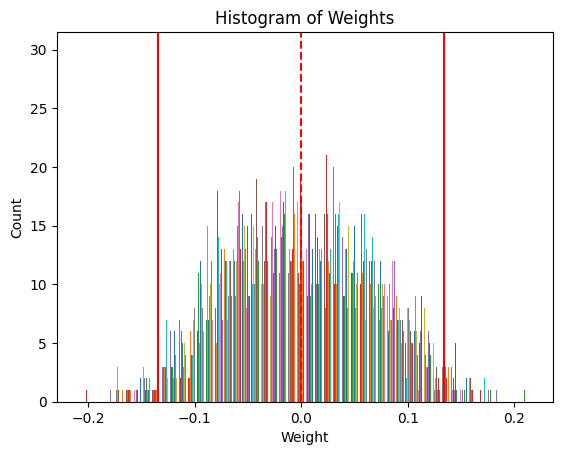

In [56]:
import matplotlib.pyplot as plt
# Calculate the mean and standard deviation of the weights.
mean = np.mean(weights)
sigma = np.std(weights)

# Plot a histogram of the weights.
plt.hist(weights, bins=50)
plt.axvline(mean, color='red', linestyle='dashed')
plt.axvline(mean + 2*sigma, color='red')
plt.axvline(mean - 2*sigma, color='red')
plt.title('Histogram of Weights')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [56]:
weights.shape

(324, 65)

In [69]:
num = []
weight_mean = np.mean(weights[:,0])
weight_std = np.std(weights[:,0])
threshold = weight_mean + 1.5* weight_std
nodes_with_weight_above_threshold = np.sum(weights[:, 0] > threshold)
ten_percent_nodes = int(0.1 * weights.shape[0])
if nodes_with_weight_above_threshold >= ten_percent_nodes:
    num.append(nodes_with_weight_above_threshold)
    print(0,nodes_with_weight_above_threshold,threshold)


In [66]:
def Tweights(weight):
  num = []
   

  for i in range(weight.shape[1]):
    weight_mean = np.mean(weight[:,i])
    weight_std = np.std(weight[:,i])
    threshold = weight_mean + 2* weight_std
    nodes_with_weight_above_threshold = np.sum(weight[:, i] > threshold)
    ten_percent_nodes = int(0.1 * weight.shape[0])
    if nodes_with_weight_above_threshold >= ten_percent_nodes:
      num.append(nodes_with_weight_above_threshold)
      #print(i,nodes_with_weight_above_threshold,threshold,)

  return num

In [122]:
def Tweights(weight):
    num = []

    for i in range(weight.shape[1]):
        weight_mean = np.mean(weight[:, i])
        weight_std = np.std(weight[:, i])
        threshold_upper = weight_mean + 1.5 * weight_std
        threshold_lower = weight_mean - 1.5 * weight_std
        nodes_with_weight_above_upper_threshold = np.sum(weight[:, i] > threshold_upper)
        nodes_with_weight_below_lower_threshold = np.sum(weight[:, i] < threshold_lower)
        ten_percent_nodes = int(0.1 * weight.shape[0])

        if nodes_with_weight_above_upper_threshold + nodes_with_weight_below_lower_threshold > ten_percent_nodes:
            num.append(nodes_with_weight_above_upper_threshold + nodes_with_weight_below_lower_threshold)
            print(i, nodes_with_weight_above_upper_threshold, threshold_upper, nodes_with_weight_below_lower_threshold, threshold_lower)

    return num




In [123]:
we = Tweights(weights)
we

0 22 0.10748101584613323 18 -0.09655524976551533
1 26 0.10407062189187855 19 -0.10017867817077786
2 21 0.09680138726253062 23 -0.10003953974228352
3 22 0.09579573082737625 24 -0.0921861280221492
4 17 0.1024098068010062 26 -0.09710137103684247
5 24 0.10038981605612207 17 -0.10002506505406927
6 21 0.09872168535366654 21 -0.09375334298238158
7 19 0.10402017791057006 17 -0.10439445864176378
8 25 0.10816700721625239 19 -0.10629004274960607
9 20 0.0948321707546711 21 -0.09978735074400902
10 20 0.10472939338069409 25 -0.10152807657141238
11 24 0.08541946485638618 17 -0.10425960645079613
12 16 0.10047454648884013 22 -0.1006325904163532
13 24 0.0967119897250086 20 -0.1001895999070257
14 18 0.10106486664153636 19 -0.10507673188112676
15 20 0.10421149432659149 19 -0.099703848361969
16 20 0.09816545806825161 22 -0.10067673213779926
17 16 0.10704913269728422 18 -0.09462466556578875
18 18 0.0996526072267443 23 -0.09765345952473581
19 18 0.10797214647755027 26 -0.10155355045571923
20 22 0.09749533492

[40,
 45,
 44,
 46,
 43,
 41,
 42,
 36,
 44,
 41,
 45,
 41,
 38,
 44,
 37,
 39,
 42,
 34,
 41,
 44,
 41,
 44,
 44,
 45,
 45,
 38,
 40,
 44,
 41,
 41,
 36,
 42,
 40,
 44,
 38,
 42,
 45,
 46,
 40,
 37,
 49,
 44,
 48,
 46,
 47,
 39,
 46,
 41,
 42,
 44,
 42,
 49,
 47,
 48,
 40,
 44,
 42,
 39,
 41,
 48,
 37,
 41,
 40,
 45,
 48]

In [124]:
len(we)

65

In [136]:
pred = np.zeros((65,708))
for i in range(weights.shape[1]):
    weight_mean = np.mean(weights[:,i])
    weight_std = np.std(weights[:,i])
    threshold_upper = weight_mean + 1.5 * weight_std
    threshold_lower = weight_mean - 1.5 * weight_std
    nodes_with_weight_above_upper_threshold = np.sum(weights[:, i] > threshold_upper)
    nodes_with_weight_below_lower_threshold = np.sum(weights[:, i] < threshold_lower)
    ten_percent_nodes = int(0.1 * weights.shape[0])
    if nodes_with_weight_above_upper_threshold + nodes_with_weight_below_lower_threshold > ten_percent_nodes:
        for h in range(input_data.shape[0]): 
            pred_i = 0
            for j in range(weights.shape[0]):
                weight_value = weights[j,i]
                if weight_value > threshold_upper or weight_value < threshold_lower:
                    pp = np.sum(weight_value*input_data[h,j])
                    pred_i += pp
                    pred[i,h] = pred_i
                

print(pred)

[[-0.08325901 -0.21462307 -0.32133384 ... -0.03189866 -0.0764543
   0.03501387]
 [-0.38264865 -0.36938884 -0.19128799 ... -0.03283761  0.03770856
   0.04944234]
 [ 0.14577215 -0.09405628  0.00807648 ...  0.01297051 -0.04988336
   0.0963433 ]
 ...
 [ 0.20090874 -0.10305408  0.18680712 ... -0.05071469  0.0905937
  -0.03993816]
 [ 0.01282789  0.02108513  0.04575948 ... -0.21391862  0.08131668
  -0.13598055]
 [-0.01486691 -0.04704276  0.1404472  ...  0.04916449 -0.19708962
  -0.01142096]]


In [131]:
# pred = np.zeros((65,708))
# for i in range(weight.shape[0]):
#     weight_mean = np.mean(weight[i,:])
#     weight_std = np.std(weight[i,:])
#     threshold = weight_mean + 1.2* weight_std
#     nodes_with_weight_above_threshold = np.sum(weight[i, :] > threshold)
#     ten_percent_nodes = int(0.1 * weights.shape[1])
#     if nodes_with_weight_above_threshold >= ten_percent_nodes:
#         for h in range(input_data.shape[0]): 
#             pred_i = 0
#             for j in range(weight.shape[1]):
#                 weight_value = weight[i,j]
#                 if weight_value > threshold:
#                     pp = np.sum(weight_value*input_data[h,j])
#                     pred_i += pp
#                     pred[i,h] = pred_i
                

# print(pred)

In [130]:
weight_value

-0.113298565

In [137]:
number_of_zeros = np.count_nonzero( pred == 0)

In [138]:
number_of_zeros

0

In [139]:
pred.shape

(65, 708)

In [140]:
predd = pred[0,:].reshape(59,12)
predd

array([[-8.32590106e-02, -2.14623068e-01, -3.21333845e-01,
        -1.81414769e-02,  5.42723815e-02, -1.53588042e-01,
        -3.54598666e-01, -4.18187501e-02, -2.23675496e-01,
        -2.72584726e-01, -7.23403835e-02, -1.04046962e-01],
       [ 9.15181882e-03, -8.83621042e-02, -1.37968121e-01,
        -1.18652892e-01, -8.35196243e-02, -1.70704023e-01,
        -8.46283810e-02, -8.33915462e-02, -1.38482433e-01,
        -1.07761022e-01, -1.65432638e-01, -4.25384759e-01],
       [-2.42833397e-01, -2.92488140e-01, -1.22015393e-01,
        -1.92813340e-01, -3.60246555e-01, -2.64544775e-01,
        -1.15819485e-01, -4.24647868e-01, -2.98872777e-01,
        -1.68085358e-01, -2.50861588e-01,  2.50431587e-01],
       [-6.30541027e-02, -2.39502721e-01,  2.62228960e-01,
        -3.32235562e-01, -1.91265433e-01,  1.20606511e-01,
         1.33207933e-03, -2.25333056e-01, -2.57764940e-01,
        -4.93444572e-02, -2.22884506e-01, -2.43166376e-01],
       [-1.16058545e-01,  7.07964188e-02, -1.3202756

In [141]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35


In [142]:
df['avg'] = df[['june', 'july', 'august', 'september']].mean(axis=1)

In [143]:
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [144]:
pred_pres = pred[1,:].reshape(59,12)
years = pd.date_range(start='1958', end='2016', freq='YS').year
months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
df_pres = df_pres.reset_index()
df_pres['enso_avg'] = df['avg'].copy()
df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
df_pres.index = df_pres.index + 1  # shifting index
df_pres = df_pres.sort_index() 
df_pres= df_pres.drop('index',axis=1)
df_6 = df_pres.iloc[1:, :5]
df_6 = df_6.reset_index()
df_12 = df_pres.iloc[0:-1, 5:12]
df_12 = df_12.reset_index()
df_13 = df_pres.iloc[1:, [12]]
df_13 = df_13.reset_index()
df_last = pd.concat([df_6, df_12, df_13], axis=1)
df_last = df_last.drop('index',axis=1)
correlation = df_last.corr(method='kendall')

In [145]:
df_12

,index,June,July,August,September,October,November,December
0,0,-0.230414,-0.104692,-0.191410,-0.059056,0.067884,-0.050783,-0.194991
1,1,-0.230414,-0.104692,-0.191410,-0.059056,0.067884,-0.050783,-0.194991
2,2,-0.338640,-0.110024,-0.136456,0.025235,-0.133682,-0.219523,-0.111715
3,3,-0.058651,-0.057351,-0.144054,0.086111,-0.185828,0.043093,-0.262164
4,4,0.032051,-0.112392,-0.070343,0.016002,-0.113880,-0.150740,-0.399605
5,5,-0.039391,-0.215751,-0.074682,-0.067518,0.043331,-0.346389,-0.157628
6,6,-0.176711,-0.084546,-0.218337,0.101910,-0.075629,-0.241033,-0.074567
7,7,-0.048648,0.163323,-0.028183,-0.200212,0.026956,0.019505,-0.014103
8,8,-0.072759,-0.267571,-0.079084,-0.228009,-0.034531,-0.065652,-0.170268
9,9,-0.033518,-0.041659,-0.312958,-0.266034,-0.135795,-0.155099,-0.142341


In [146]:
df_pres

,January,February,March,April,May,June,July,August,September,October,November,December,enso_avg
0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.230414,-0.104692,-0.191410,-0.059056,0.067884,-0.050783,-0.194991,0.0675
1,-0.382649,-0.369389,-0.191288,-0.112276,-0.257690,-0.230414,-0.104692,-0.191410,-0.059056,0.067884,-0.050783,-0.194991,0.0675
2,-0.424409,0.214196,-0.007612,-0.279298,-0.089708,-0.338640,-0.110024,-0.136456,0.025235,-0.133682,-0.219523,-0.111715,-0.3875
3,-0.367590,-0.254728,-0.070300,-0.040941,0.075903,-0.058651,-0.057351,-0.144054,0.086111,-0.185828,0.043093,-0.262164,-0.1050
4,-0.159515,-0.030515,-0.341679,-0.400766,-0.047397,0.032051,-0.112392,-0.070343,0.016002,-0.113880,-0.150740,-0.399605,-0.2475
5,-0.080859,-0.036368,-0.361972,0.012766,-0.132327,-0.039391,-0.215751,-0.074682,-0.067518,0.043331,-0.346389,-0.157628,-0.3025
6,-0.146899,-0.105647,0.110321,-0.129682,0.013110,-0.176711,-0.084546,-0.218337,0.101910,-0.075629,-0.241033,-0.074567,0.5975
7,0.096282,-0.180883,0.020769,-0.037783,0.100773,-0.048648,0.163323,-0.028183,-0.200212,0.026956,0.019505,-0.014103,-0.8050
8,-0.073053,-0.257523,-0.043488,-0.076149,-0.130939,-0.072759,-0.267571,-0.079084,-0.228009,-0.034531,-0.065652,-0.170268,0.9425
9,-0.316201,-0.403856,-0.067264,-0.124662,0.102673,-0.033518,-0.041659,-0.312958,-0.266034,-0.135795,-0.155099,-0.142341,0.0550


In [147]:
df_last

,January,February,March,April,May,June,July,August,September,October,November,December,enso_avg
0,-0.382649,-0.369389,-0.191288,-0.112276,-0.257690,-0.230414,-0.104692,-0.191410,-0.059056,0.067884,-0.050783,-0.194991,0.0675
1,-0.424409,0.214196,-0.007612,-0.279298,-0.089708,-0.230414,-0.104692,-0.191410,-0.059056,0.067884,-0.050783,-0.194991,-0.3875
2,-0.367590,-0.254728,-0.070300,-0.040941,0.075903,-0.338640,-0.110024,-0.136456,0.025235,-0.133682,-0.219523,-0.111715,-0.1050
3,-0.159515,-0.030515,-0.341679,-0.400766,-0.047397,-0.058651,-0.057351,-0.144054,0.086111,-0.185828,0.043093,-0.262164,-0.2475
4,-0.080859,-0.036368,-0.361972,0.012766,-0.132327,0.032051,-0.112392,-0.070343,0.016002,-0.113880,-0.150740,-0.399605,-0.3025
5,-0.146899,-0.105647,0.110321,-0.129682,0.013110,-0.039391,-0.215751,-0.074682,-0.067518,0.043331,-0.346389,-0.157628,0.5975
6,0.096282,-0.180883,0.020769,-0.037783,0.100773,-0.176711,-0.084546,-0.218337,0.101910,-0.075629,-0.241033,-0.074567,-0.8050
7,-0.073053,-0.257523,-0.043488,-0.076149,-0.130939,-0.048648,0.163323,-0.028183,-0.200212,0.026956,0.019505,-0.014103,0.9425
8,-0.316201,-0.403856,-0.067264,-0.124662,0.102673,-0.072759,-0.267571,-0.079084,-0.228009,-0.034531,-0.065652,-0.170268,0.0550
9,0.031282,0.001379,-0.166403,-0.085461,-0.186559,-0.033518,-0.041659,-0.312958,-0.266034,-0.135795,-0.155099,-0.142341,-0.2800


In [148]:
correlation

,January,February,March,April,May,June,July,August,September,October,November,December,enso_avg
January,1.000000,0.064874,0.144360,0.055523,-0.130333,0.130956,0.093540,-0.112248,-0.086524,0.178895,0.053785,0.099386,0.014039
February,0.064874,1.000000,0.163063,-0.063705,-0.111631,0.115756,0.220988,0.097048,-0.015200,0.014031,0.090032,0.056124,-0.012869
March,0.144360,0.163063,1.000000,-0.140853,0.047341,0.005846,0.024554,-0.050278,0.050278,0.088863,0.059632,0.060801,0.045627
April,0.055523,-0.063705,-0.140853,1.000000,0.061368,0.137971,0.079509,0.137971,0.051447,0.160187,0.056124,0.010523,0.143902
May,-0.130333,-0.111631,0.047341,0.061368,1.000000,-0.042093,-0.126279,-0.039754,0.051447,-0.040924,-0.070155,-0.120433,-0.057327
June,0.130956,0.115756,0.005846,0.137971,-0.042093,1.000000,0.122807,0.174269,0.038596,0.028070,0.207018,-0.007018,0.153891
July,0.093540,0.220988,0.024554,0.079509,-0.126279,0.122807,1.000000,0.022222,-0.036257,0.021053,0.162573,0.051462,0.064950
August,-0.112248,0.097048,-0.050278,0.137971,-0.039754,0.174269,0.022222,1.000000,0.029240,-0.112281,0.136842,0.100585,0.215916
September,-0.086524,-0.015200,0.050278,0.051447,0.051447,0.038596,-0.036257,0.029240,1.000000,-0.060819,-0.080702,-0.035088,-0.137507
October,0.178895,0.014031,0.088863,0.160187,-0.040924,0.028070,0.021053,-0.112281,-0.060819,1.000000,0.112281,0.008187,0.066121


In [149]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_preds = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='pearson')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_preds.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_preds[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation,column_name , abs(highest_correlation)))
        print(i,highest_correlation,column_name,abs(highest_correlation))
        result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Correlation', 'Column_Name', 'Absolute_Correlation'])
    return top_preds,result_df
        
    

In [150]:
top_predp,resultp = potential_predictors_new(pred)

0 0.26874848172060545 November 0.26874848172060545
1 0.279798177677197 June 0.279798177677197
2 -0.22501456881911092 May 0.22501456881911092
3 0.2921867103459883 November_2 0.2921867103459883
4 0.3886710346806523 April 0.3886710346806523
5 -0.18412437936104253 May_2 0.18412437936104253
6 0.291437636771383 July 0.291437636771383
7 -0.22886820011857179 October 0.22886820011857179
8 0.20571118811875636 July_2 0.20571118811875636
9 -0.3501577468060671 January 0.3501577468060671
10 -0.37547729385790996 March 0.37547729385790996
11 -0.22388010337117698 March_2 0.22388010337117698
12 0.3421956393568698 July_3 0.3421956393568698
13 -0.17094261318002782 August 0.17094261318002782
14 0.22728412867986605 August_2 0.22728412867986605
15 -0.24807750126623093 March_3 0.24807750126623093
16 -0.31016858514250434 March_4 0.31016858514250434
17 -0.2767407213616308 March_5 0.2767407213616308
18 -0.24925149915539194 August_3 0.24925149915539194
19 -0.20112534467650398 July_4 0.20112534467650398
20 0.23323

In [151]:
resultp = resultp.sort_values(by='Absolute_Correlation', ascending=False)
resultp

,Iteration,Correlation,Column_Name,Absolute_Correlation
33,33,-0.422409,August_5,0.422409
4,4,0.388671,April,0.388671
10,10,-0.375477,March,0.375477
40,40,-0.370681,June_5,0.370681
31,31,-0.366116,July_5,0.366116
...,...,...,...,...
34,34,-0.187051,December_2,0.187051
5,5,-0.184124,May_2,0.184124
13,13,-0.170943,August,0.170943
36,36,0.168553,April_5,0.168553


In [152]:
top_predp['August_5']

0     0.173801
1     0.173801
2     0.078722
3     0.200619
4     0.066421
5     0.181914
6     0.197033
7     0.047488
8     0.076684
9     0.008712
10    0.014683
11    0.045015
12    0.101952
13    0.145491
14    0.009026
15    0.157434
16    0.186691
17    0.126203
18    0.029998
19   -0.053074
20    0.083676
21    0.005589
22    0.070026
23    0.005114
24   -0.286523
25    0.231325
26    0.132711
27   -0.061622
28   -0.015655
29   -0.096052
30    0.173135
31   -0.104958
32    0.142966
33   -0.133247
34   -0.270748
35   -0.025943
36    0.077469
37    0.199479
38   -0.080390
39   -0.096758
40   -0.001092
41   -0.087892
42    0.197405
43    0.075233
44    0.089446
45    0.162649
46    0.017704
47    0.058050
48    0.253691
49    0.186830
50    0.316879
51    0.041799
52    0.177869
53    0.052796
54    0.044075
55    0.170214
56    0.003363
57   -0.038515
58    0.123317
Name: August_5, dtype: float64

In [153]:
unique_values_listp = resultp['Column_Name'].unique().tolist()

In [154]:
top_predp = top_predp[unique_values_listp]

In [155]:
top_predp

,August_5,April,March,June_5,July_5,March_10,January,July_3,June_2,June_7,...,July_4,April_4,January_4,April_7,April_3,December_2,May_2,August,April_5,April_2
0,0.173801,-0.002750,0.084398,-0.048842,-0.189660,-0.166767,0.037145,0.041782,-0.246982,-0.099872,...,0.229512,0.143287,-0.037717,0.032395,-0.212340,-0.111043,-0.111608,0.023575,0.216679,-0.137735
1,0.173801,0.040800,-0.104549,-0.048842,-0.189660,-0.028929,0.219823,0.041782,-0.246982,-0.099872,...,0.229512,0.263908,-0.000161,-0.082949,-0.182839,-0.111043,-0.115094,0.023575,0.035387,0.003578
2,0.078722,0.142548,-0.232855,-0.067543,0.014997,0.082504,0.250218,0.001687,-0.270478,-0.003044,...,0.170333,0.116438,0.024762,0.027148,-0.208807,-0.122786,-0.064008,-0.035349,-0.026559,-0.029898
3,0.200619,-0.071515,0.333424,0.116884,-0.006515,-0.077085,0.064929,0.081143,-0.207746,-0.091467,...,0.350859,0.139916,0.030431,-0.067703,-0.229931,0.196156,-0.139968,-0.056133,-0.307477,-0.156327
4,0.066421,0.172059,0.248699,-0.015204,-0.026827,-0.206919,0.055222,0.089412,-0.271873,-0.064842,...,0.177754,0.200722,0.147759,-0.176628,-0.089384,0.088682,-0.241604,0.075136,0.231210,-0.147981
5,0.181914,0.155363,0.042786,-0.081506,-0.080056,0.347408,-0.057246,0.137466,-0.187537,0.202774,...,0.239152,0.338089,0.092536,0.130420,-0.029988,-0.098907,-0.026475,-0.051141,0.049660,-0.219271
6,0.197033,-0.045476,-0.039229,0.215283,-0.061821,0.037865,0.028595,-0.132436,-0.276764,-0.006622,...,0.273189,0.080741,-0.020883,0.307669,-0.052375,0.110710,-0.089521,-0.141040,0.220000,-0.194003
7,0.047488,0.095620,0.053216,-0.193670,-0.100820,-0.074511,-0.123023,0.219554,-0.046838,-0.058215,...,0.001406,0.152155,-0.000968,-0.066610,-0.117405,0.112168,-0.084969,-0.305065,0.065746,-0.182276
8,0.076684,0.140553,-0.014757,0.227461,-0.075369,0.082748,0.195043,0.089689,-0.318884,-0.065220,...,0.203617,0.116362,-0.070061,0.107521,-0.202961,0.028120,-0.171550,0.001816,0.040422,-0.115605
9,0.008712,-0.000501,0.181089,0.363031,-0.222883,0.086786,0.355954,0.086203,-0.090528,-0.023049,...,0.076774,0.216849,-0.069812,0.044638,0.040304,0.098081,-0.141607,0.099150,0.227646,-0.354969


In [157]:
top_predp.to_csv('pearson_corr.csv', index=False)

In [158]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_preds = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='kendall')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_preds.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_preds[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation,column_name , abs(highest_correlation)))
        print(i,highest_correlation,column_name,abs(highest_correlation))
        result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Correlation', 'Column_Name', 'Absolute_Correlation'])
    return top_preds,result_df
        
    

In [159]:
top_predk,resultk = potential_predictors_new(pred)

0 0.1679344933483848 December 0.1679344933483848
1 0.21591577716220903 August 0.21591577716220903
2 -0.17432004370740248 March 0.17432004370740248
3 0.17378586942324142 November 0.17378586942324142
4 0.2346401806017502 June 0.2346401806017502
5 -0.14390178104705037 April 0.14390178104705037
6 0.18665889678792597 July 0.18665889678792597
7 -0.12463431039444585 October 0.12463431039444585
8 0.12814513603935984 October_2 0.12814513603935984
9 -0.25855523261299296 January 0.25855523261299296
10 -0.24100623492432827 April_2 0.24100623492432827
11 -0.16262071191495936 March_2 0.16262071191495936
12 0.21240495151729505 July_2 0.21240495151729505
13 0.16091284205855685 September 0.16091284205855685
14 0.14686953947890097 August_2 0.14686953947890097
15 -0.1848494423206013 March_3 0.1848494423206013
16 -0.2152677049809534 March_4 0.2152677049809534
17 -0.1965487741130444 March_5 0.1965487741130444
18 0.23698073103169284 September_2 0.23698073103169284
19 -0.14569926426392965 July_3 0.1456992642

In [160]:
resultk = resultk.sort_values(by='Absolute_Correlation', ascending=False)
resultk

,Iteration,Correlation,Column_Name,Absolute_Correlation
33,33,-0.281451,August_4,0.281451
26,26,0.263897,June_2,0.263897
9,9,-0.258555,January,0.258555
31,31,-0.258046,July_5,0.258046
54,54,0.252706,March_13,0.252706
...,...,...,...,...
7,7,-0.124634,October,0.124634
22,22,0.118163,April_3,0.118163
52,52,-0.115823,January_4,0.115823
34,34,0.099444,January_2,0.099444


In [162]:
top_predk['August_4']

0     0.173801
1     0.173801
2     0.078722
3     0.200619
4     0.066421
5     0.181914
6     0.197033
7     0.047488
8     0.076684
9     0.008712
10    0.014683
11    0.045015
12    0.101952
13    0.145491
14    0.009026
15    0.157434
16    0.186691
17    0.126203
18    0.029998
19   -0.053074
20    0.083676
21    0.005589
22    0.070026
23    0.005114
24   -0.286523
25    0.231325
26    0.132711
27   -0.061622
28   -0.015655
29   -0.096052
30    0.173135
31   -0.104958
32    0.142966
33   -0.133247
34   -0.270748
35   -0.025943
36    0.077469
37    0.199479
38   -0.080390
39   -0.096758
40   -0.001092
41   -0.087892
42    0.197405
43    0.075233
44    0.089446
45    0.162649
46    0.017704
47    0.058050
48    0.253691
49    0.186830
50    0.316879
51    0.041799
52    0.177869
53    0.052796
54    0.044075
55    0.170214
56    0.003363
57   -0.038515
58    0.123317
Name: August_4, dtype: float64

In [163]:
unique_values_listk = resultk['Column_Name'].unique().tolist()

In [164]:
top_predk = top_predk[unique_values_listk]

In [165]:
top_predk

,August_4,June_2,January,July_5,March_13,April_2,September_2,June_4,June,August,...,July_4,June_3,March_10,October_2,February,October,April_3,January_4,January_2,April_5
0,0.173801,-0.246982,0.037145,-0.189660,-0.166767,-0.126610,0.074634,-0.048842,0.011820,-0.191410,...,-0.120976,-0.185649,-0.147576,0.075908,-0.089239,0.095148,-0.137735,0.101336,0.019519,0.216679
1,0.173801,-0.246982,0.219823,-0.189660,-0.028929,-0.160105,0.074634,-0.048842,0.011820,-0.191410,...,-0.120976,-0.185649,0.226802,0.075908,-0.002890,0.095148,0.003578,-0.109485,-0.051693,0.035387
2,0.078722,-0.270478,0.250218,0.014997,0.082504,-0.063352,-0.003477,-0.067543,0.179341,-0.136456,...,-0.023315,-0.016789,0.041561,-0.049806,-0.030470,0.158349,-0.029898,0.152987,-0.041941,-0.026559
3,0.200619,-0.207746,0.064929,-0.006515,-0.077085,0.291598,-0.018291,0.116884,0.150370,-0.144054,...,-0.097687,-0.047519,-0.052619,0.088778,-0.085360,0.069833,-0.156327,-0.022712,0.140437,-0.307477
4,0.066421,-0.271873,0.055222,-0.026827,-0.206919,-0.248341,-0.067162,-0.015204,-0.074139,-0.070343,...,0.001660,0.013588,-0.036431,0.059313,-0.148638,0.070349,-0.147981,-0.210183,-0.152293,0.231210
5,0.181914,-0.187537,-0.057246,-0.080056,0.347408,-0.062833,0.067173,-0.081506,0.237600,-0.074682,...,0.017217,-0.082590,-0.093468,-0.061726,-0.024936,0.082662,-0.219271,0.007247,0.108502,0.049660
6,0.197033,-0.276764,0.028595,-0.061821,0.037865,0.060380,-0.067496,0.215283,-0.149470,-0.218337,...,-0.030088,-0.213891,-0.109296,-0.197873,0.051904,0.233380,-0.194003,0.025275,-0.235443,0.220000
7,0.047488,-0.046838,-0.123023,-0.100820,-0.074511,0.036262,0.086661,-0.193670,-0.304787,-0.028183,...,-0.093466,-0.173949,-0.057679,-0.056069,-0.229585,0.043024,-0.182276,-0.131982,0.048346,0.065746
8,0.076684,-0.318884,0.195043,-0.075369,0.082748,-0.009301,0.115105,0.227461,-0.011094,-0.079084,...,-0.156852,-0.023991,0.059739,-0.105813,-0.065014,0.212778,-0.115605,0.055848,0.244561,0.040422
9,0.008712,-0.090528,0.355954,-0.222883,0.086786,-0.005787,0.213483,0.363031,0.115686,-0.312958,...,0.012357,-0.193913,-0.351910,0.027952,-0.193390,0.018540,-0.354969,-0.007506,-0.056069,0.227646


In [166]:
top_predk.to_csv('kendall_corr.csv', index=False)

In [167]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_preds = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='spearman')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_preds.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_preds[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation,column_name , abs(highest_correlation)))
        print(i,highest_correlation,column_name,abs(highest_correlation))
        result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Correlation', 'Column_Name', 'Absolute_Correlation'])
    return top_preds,result_df
        
    

In [168]:
top_preds,results = potential_predictors_new(pred)

0 0.25168040223501087 November 0.25168040223501087
1 0.28575603495749374 August 0.28575603495749374
2 -0.2558265268322924 March 0.2558265268322924
3 0.27313110070696833 November_2 0.27313110070696833
4 0.35805193131702606 April 0.35805193131702606
5 -0.19843067365675865 April_2 0.19843067365675865
6 0.27769010474188033 July 0.27769010474188033
7 -0.18525337549555665 October 0.18525337549555665
8 0.1937284470989186 July_2 0.1937284470989186
9 -0.3821032486100323 January 0.3821032486100323
10 -0.34402443155925816 April_3 0.34402443155925816
11 -0.24524745409830906 March_2 0.24524745409830906
12 0.29122099492242026 July_3 0.29122099492242026
13 0.22336197332584626 September 0.22336197332584626
14 0.22493680340737426 May 0.22493680340737426
15 -0.278825781643466 March_3 0.278825781643466
16 -0.3119949737790214 March_4 0.3119949737790214
17 -0.29270716161209054 March_5 0.29270716161209054
18 0.35720965588928677 September_2 0.35720965588928677
19 -0.2310187621537112 July_4 0.2310187621537112

In [169]:
top_preds

,November,August,March,November_2,April,April_2,July,October,July_2,January,...,September_3,February_3,August_4,January_5,November_7,November_8,June_6,October_3,April_12,March_13
0,-0.072340,-0.191410,0.008076,0.153266,-0.002750,-0.161762,-0.164546,0.095148,0.033968,0.037145,...,0.096036,-0.169603,0.144027,-0.037717,-0.196913,0.053479,-0.052108,0.249137,-0.049197,0.140447
1,-0.072340,-0.191410,0.157753,0.153266,0.040800,0.010080,-0.164546,0.095148,0.033968,0.219823,...,0.096036,-0.088127,0.144027,-0.000161,-0.196913,0.053479,-0.052108,0.249137,-0.089925,0.141708
2,-0.165433,-0.136456,-0.010802,0.129095,0.142548,-0.090633,-0.155266,0.158349,-0.167217,0.250218,...,-0.134837,-0.046055,0.206693,0.024762,0.048915,0.021781,0.026802,-0.201080,0.216991,0.048377
3,-0.250862,-0.144054,0.193946,-0.087649,-0.071515,-0.087813,-0.119233,0.069833,-0.140887,0.064929,...,0.045894,-0.146334,0.089014,0.030431,0.101244,0.124592,0.058715,0.013661,0.086507,-0.253920
4,-0.222885,-0.070343,0.022700,-0.116773,0.172059,-0.203662,-0.302913,0.070349,-0.102237,0.055222,...,-0.131251,-0.112737,0.172397,0.147759,0.008774,-0.025432,0.096563,0.044273,-0.245776,0.193593
5,-0.045097,-0.074682,-0.189410,-0.021513,0.155363,-0.256705,-0.079787,0.082662,-0.000445,-0.057246,...,0.002581,-0.097271,0.173876,0.092536,-0.082482,0.007709,0.187809,0.040014,0.070101,0.087083
6,-0.150865,-0.218337,-0.192774,-0.057508,-0.045476,0.096069,-0.217218,0.233380,0.156568,0.028595,...,-0.031013,0.003865,0.198554,-0.020883,0.161812,-0.079806,0.089521,-0.215033,0.061699,0.199804
7,-0.077404,-0.028183,0.149158,-0.014423,0.095620,-0.037897,0.077121,0.043024,0.019028,-0.123023,...,-0.022530,0.020322,-0.094047,-0.000968,0.227645,-0.088267,0.028090,0.161087,0.042923,0.422829
8,-0.057956,-0.079084,-0.016596,-0.300229,0.140553,0.134161,-0.246208,0.212778,-0.088988,0.195043,...,-0.125780,-0.190769,0.090755,-0.070061,0.264109,-0.150185,0.105416,-0.105455,0.163665,-0.038899
9,0.128180,-0.312958,-0.071139,-0.028827,-0.000501,-0.153592,-0.048474,0.018540,0.076925,0.355954,...,-0.095256,-0.213031,0.161279,-0.069812,0.230968,0.042717,0.056851,-0.035508,-0.234234,0.092797


In [170]:
results = results.sort_values(by='Absolute_Correlation', ascending=False)
results

,Iteration,Correlation,Column_Name,Absolute_Correlation
26,26,0.406424,June,0.406424
33,33,-0.405810,August_3,0.405810
31,31,-0.388158,July_6,0.388158
9,9,-0.382103,January,0.382103
54,54,0.377164,March_12,0.377164
...,...,...,...,...
22,22,0.183263,April_4,0.183263
28,28,0.181598,March_6,0.181598
52,52,-0.158306,January_4,0.158306
34,34,0.142730,January_2,0.142730


In [171]:
unique_values_lists = results['Column_Name'].unique().tolist()

In [172]:
top_preds = top_preds[unique_values_lists]

In [174]:
top_preds

,June,August_3,July_6,January,March_12,April,September_2,April_3,June_3,April_10,...,February,March_9,June_6,October,June_2,April_4,March_6,January_4,January_2,April_7
0,-0.246982,0.173801,-0.189660,0.037145,-0.166767,-0.002750,0.074634,-0.126610,-0.048842,0.197433,...,-0.089239,-0.147576,-0.052108,0.095148,-0.185649,-0.137735,0.088867,0.101336,0.019519,0.216679
1,-0.246982,0.173801,-0.189660,0.219823,-0.028929,0.040800,0.074634,-0.160105,-0.048842,0.017463,...,-0.002890,0.226802,-0.052108,0.095148,-0.185649,0.003578,-0.079983,-0.109485,-0.051693,0.035387
2,-0.270478,0.078722,0.014997,0.250218,0.082504,0.142548,-0.003477,-0.063352,-0.067543,-0.088747,...,-0.030470,0.041561,0.026802,0.158349,-0.016789,-0.029898,0.068181,0.152987,-0.041941,-0.026559
3,-0.207746,0.200619,-0.006515,0.064929,-0.077085,-0.071515,-0.018291,0.291598,0.116884,0.077834,...,-0.085360,-0.052619,0.058715,0.069833,-0.047519,-0.156327,-0.271478,-0.022712,0.140437,-0.307477
4,-0.271873,0.066421,-0.026827,0.055222,-0.206919,0.172059,-0.067162,-0.248341,-0.015204,-0.197786,...,-0.148638,-0.036431,0.096563,0.070349,0.013588,-0.147981,0.001465,-0.210183,-0.152293,0.231210
5,-0.187537,0.181914,-0.080056,-0.057246,0.347408,0.155363,0.067173,-0.062833,-0.081506,-0.216351,...,-0.024936,-0.093468,0.187809,0.082662,-0.082590,-0.219271,0.228616,0.007247,0.108502,0.049660
6,-0.276764,0.197033,-0.061821,0.028595,0.037865,-0.045476,-0.067496,0.060380,0.215283,0.133855,...,0.051904,-0.109296,0.089521,0.233380,-0.213891,-0.194003,0.023234,0.025275,-0.235443,0.220000
7,-0.046838,0.047488,-0.100820,-0.123023,-0.074511,0.095620,0.086661,0.036262,-0.193670,-0.102931,...,-0.229585,-0.057679,0.028090,0.043024,-0.173949,-0.182276,-0.025148,-0.131982,0.048346,0.065746
8,-0.318884,0.076684,-0.075369,0.195043,0.082748,0.140553,0.115105,-0.009301,0.227461,0.138249,...,-0.065014,0.059739,0.105416,0.212778,-0.023991,-0.115605,-0.121172,0.055848,0.244561,0.040422
9,-0.090528,0.008712,-0.222883,0.355954,0.086786,-0.000501,0.213483,-0.005787,0.363031,-0.179878,...,-0.193390,-0.351910,0.056851,0.018540,-0.193913,-0.354969,-0.090068,-0.007506,-0.056069,0.227646


In [175]:
top_preds.to_csv('spearman_corr.csv', index=False)

In [176]:
from sklearn.feature_selection import mutual_info_regression

def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_predd = pd.DataFrame()
    
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        
        # Create the DataFrame
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957, 0, 0, 0, 0, 0, df_pres['June'][0], df_pres['July'][0], df_pres['August'][0], df_pres['September'][0], df_pres['October'][0], df_pres['November'][0], df_pres['December'][0], df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # Shifting index
        df_pres = df_pres.sort_index() 
        df_pres = df_pres.drop('index', axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index', axis=1)
        
        # Calculate mutual information
        features = df_last.drop('enso_avg', axis=1)
        target = df_last['enso_avg']
        mutual_info = mutual_info_regression(features, target)
        
        highest_mutual_info_index = np.argmax(mutual_info)
        highest_mutual_info_value = mutual_info[highest_mutual_info_index]
        highest_mutual_info_column = df_last.columns[highest_mutual_info_index]

        column_name = highest_mutual_info_column
        suffix_index = 1
        while column_name in top_predd.columns:
            suffix_index += 1
            column_name = f"{highest_mutual_info_column}_{suffix_index}"
        
        top_predd[column_name] = df_last[highest_mutual_info_column]
        top_correlation.append((i, highest_mutual_info_value, column_name, abs(highest_mutual_info_value)))
        print(i, highest_mutual_info_value, column_name, abs(highest_mutual_info_value))
        
    result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Mutual_Information', 'Column_Name', 'Absolute_Mutual_Information'])
    return top_predd, result_df


In [177]:
top_predm,resultm = potential_predictors_new(pred)

0 0.21947315498999398 August 0.21947315498999398
1 0.11473081460665702 November 0.11473081460665702
2 0.07114442987519354 September 0.07114442987519354
3 0.11388272890452722 December 0.11388272890452722
4 0.12685761084320202 April 0.12685761084320202
5 0.2823427857705343 September_2 0.2823427857705343
6 0.12096939496091696 December_2 0.12096939496091696
7 0.10860270689361995 May 0.10860270689361995
8 0.11923190288875318 May_2 0.11923190288875318
9 0.21629776058603545 March 0.21629776058603545
10 0.25863540801668883 May_3 0.25863540801668883
11 0.21169805759520477 December_3 0.21169805759520477
12 0.09413647674413284 June 0.09413647674413284
13 0.15924545675227364 September_3 0.15924545675227364
14 0.13413881844643383 May_4 0.13413881844643383
15 0.09034751868383806 May_5 0.09034751868383806
16 0.1667315200583248 December_4 0.1667315200583248
17 0.18501449739516707 March_2 0.18501449739516707
18 0.11488119231843008 January 0.11488119231843008
19 0.17647517036207905 February 0.1764751703

In [184]:
top_predm

,August,November,September,December,April,September_2,December_2,May,May_2,March,...,September_7,April_8,June_8,July_2,April_9,November_2,November_3,August_8,April_10,June_9
0,-0.041819,-0.050783,-0.000260,0.068596,-0.002750,-0.016901,-0.132288,-0.195524,-0.221272,0.288117,...,0.096036,-0.197046,-0.007179,0.008291,0.093170,0.053479,-0.131658,0.325389,-0.049197,0.108267
1,-0.041819,-0.050783,-0.000260,0.068596,0.040800,-0.016901,-0.132288,0.049225,0.125031,0.067485,...,0.096036,-0.057855,-0.007179,0.008291,0.218701,0.053479,-0.131658,0.325389,-0.089925,0.108267
2,-0.083392,-0.219523,-0.233242,-0.122807,0.142548,-0.221252,-0.044085,0.121219,-0.076404,0.166618,...,-0.134837,-0.162548,0.188693,-0.049545,0.086521,0.021781,-0.014348,-0.148339,0.216991,-0.013659
3,-0.424648,0.043093,-0.071994,0.264502,-0.071515,-0.076903,-0.268571,0.124207,0.017316,-0.173581,...,0.045894,-0.183184,0.068752,-0.080818,-0.050785,0.124592,0.062607,-0.111316,0.086507,-0.072336
4,-0.225333,-0.150740,0.157538,-0.040618,0.172059,-0.073903,-0.162019,0.202612,0.002176,0.048161,...,-0.131251,-0.138157,0.098808,0.023534,0.061213,-0.025432,-0.100054,-0.263994,-0.245776,-0.080532
5,-0.016780,-0.346389,-0.004240,-0.032534,0.155363,-0.026220,-0.058498,0.208042,-0.306881,0.249766,...,0.002581,-0.058086,0.020957,0.057841,0.157037,0.007709,0.052671,-0.017123,0.070101,0.327694
6,-0.275643,-0.241033,0.042904,0.166117,-0.045476,0.020829,0.067264,-0.000269,-0.059133,0.193650,...,-0.031013,-0.150267,0.120534,-0.069345,0.109580,-0.079806,0.011005,-0.015873,0.061699,0.039786
7,-0.094938,0.019505,0.072151,-0.138985,0.095620,-0.030754,-0.022642,0.004855,-0.003506,-0.152923,...,-0.022530,0.097726,0.121229,0.074418,0.122874,-0.088267,0.073115,0.075918,0.042923,0.213775
8,-0.091121,-0.065652,0.019239,-0.115653,0.140553,-0.108001,-0.323501,-0.191036,0.411023,0.155343,...,-0.125780,0.111775,0.185554,0.080060,0.326347,-0.150185,0.001081,-0.153969,0.163665,-0.056029
9,-0.024709,-0.155099,0.078801,-0.203603,-0.000501,-0.324669,-0.118071,-0.059931,0.064751,0.025106,...,-0.095256,-0.098368,-0.083150,0.068611,0.042232,0.042717,0.096823,-0.020620,-0.234234,0.057159


In [181]:
resultm

,Iteration,Mutual_Information,Column_Name,Absolute_Mutual_Information
0,0,0.219473,August,0.219473
1,1,0.114731,November,0.114731
2,2,0.071144,September,0.071144
3,3,0.113883,December,0.113883
4,4,0.126858,April,0.126858
...,...,...,...,...
60,60,0.090056,November_2,0.090056
61,61,0.039394,November_3,0.039394
62,62,0.061010,August_8,0.061010
63,63,0.163359,April_10,0.163359


In [182]:
resultm = resultm.sort_values(by='Absolute_Mutual_Information', ascending=False)
resultm

,Iteration,Mutual_Information,Column_Name,Absolute_Mutual_Information
31,31,0.329899,July,0.329899
5,5,0.282343,September_2,0.282343
10,10,0.258635,May_3,0.258635
36,36,0.234557,September_4,0.234557
0,0,0.219473,August,0.219473
...,...,...,...,...
48,48,0.052016,August_5,0.052016
21,21,0.046965,August_2,0.046965
40,40,0.042048,June_7,0.042048
61,61,0.039394,November_3,0.039394


In [183]:
unique_values_listm = resultm['Column_Name'].unique().tolist()

In [185]:
top_predm = top_predm[unique_values_listm]

In [186]:
top_predm

,July,September_2,May_3,September_4,August,March,December_3,April_4,January_5,March_2,...,June_2,June_3,September,August_8,September_7,August_5,August_2,June_7,November_3,August_7
0,-0.189660,-0.016901,0.084956,0.017206,-0.041819,0.288117,-0.055267,0.032395,0.203709,0.030777,...,-0.065592,-0.087679,-0.000260,0.325389,0.096036,0.134729,-0.215216,-0.048842,-0.131658,-0.133468
1,-0.189660,-0.016901,-0.178264,0.017206,-0.041819,0.067485,-0.055267,-0.082949,0.214232,-0.007671,...,-0.065592,-0.087679,-0.000260,0.325389,0.096036,0.134729,-0.215216,-0.048842,-0.131658,-0.133468
2,0.014997,-0.221252,0.074123,-0.075136,-0.083392,0.166618,-0.181203,0.027148,0.053032,0.037394,...,0.064783,0.165944,-0.233242,-0.148339,-0.134837,-0.038791,-0.156816,-0.067543,-0.014348,-0.008548
3,-0.006515,-0.076903,-0.087718,0.368969,-0.424648,-0.173581,-0.084343,-0.067703,-0.002182,-0.170964,...,-0.215655,0.239975,-0.071994,-0.111316,0.045894,-0.081037,0.175279,0.116884,0.062607,-0.140211
4,-0.026827,-0.073903,0.171433,0.245962,-0.225333,0.048161,-0.071160,-0.176628,0.039767,-0.136344,...,-0.175675,0.022645,0.157538,-0.263994,-0.131251,-0.119851,0.101147,-0.015204,-0.100054,0.026720
5,-0.080056,-0.026220,0.149470,0.135084,-0.016780,0.249766,-0.056236,0.130420,-0.030620,-0.138137,...,-0.062603,0.267858,-0.004240,-0.017123,0.002581,0.086573,-0.060701,-0.081506,0.052671,0.026575
6,-0.061821,0.020829,-0.080109,0.343904,-0.275643,0.193650,-0.003633,0.307669,-0.056142,0.105050,...,-0.093203,0.092261,0.042904,-0.015873,-0.031013,-0.008158,0.022486,0.215283,0.011005,-0.068368
7,-0.100820,-0.030754,0.136568,-0.016081,-0.094938,-0.152923,0.051899,-0.066610,0.149294,0.125821,...,-0.020713,-0.140989,0.072151,0.075918,-0.022530,-0.053105,-0.155501,-0.193670,0.073115,0.202885
8,-0.075369,-0.108001,-0.164583,-0.078644,-0.091121,0.155343,-0.006757,0.107521,0.157716,-0.134568,...,0.018775,-0.081334,0.019239,-0.153969,-0.125780,0.060548,0.107886,0.227461,0.001081,0.019263
9,-0.222883,-0.324669,-0.060664,0.045283,-0.024709,0.025106,-0.033458,0.044638,0.211980,-0.224729,...,-0.160922,0.152574,0.078801,-0.020620,-0.095256,0.048980,-0.001588,0.363031,0.096823,-0.202655


In [187]:
top_predm.to_csv('mutual_corr.csv', index=False)